# Understanding the dataset

In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#reading data from the csv file on Kaggle
#data= pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv")

#reading data from local csv
data=pd.read_csv("2019_nCoV_data.csv")
data.shape

(770, 8)

In [38]:
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [39]:
data.drop("Sno", axis=1, inplace=True)
data.drop("Last Update", axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 6 columns):
Date              770 non-null object
Province/State    585 non-null object
Country           770 non-null object
Confirmed         770 non-null float64
Deaths            770 non-null float64
Recovered         770 non-null float64
dtypes: float64(3), object(3)
memory usage: 27.1+ KB


In [40]:
data.describe()

,Confirmed,Deaths,Recovered
count,770.000000,770.000000,770.000000
mean,160.207792,3.436364,4.264935
std,1015.504102,31.553727,28.718715
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,8.000000,0.000000,0.000000
75%,58.750000,0.000000,1.000000
max,16678.000000,479.000000,522.000000


In [41]:
#checking for duplicate rows
duplicate_rows=data.duplicated(subset=['Country','Province/State','Date'])
data[duplicate_rows]

,Date,Province/State,Country,Confirmed,Deaths,Recovered


In [42]:
country_list=list(data['Country'].unique())
print(country_list)
print (len(country_list))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium']
32


In [43]:
#merging China and Mainland China
data.loc[data['Country']=='Mainland China','Country']='China'

In [44]:
print(list(data['Date'].unique()))
print(len(list(data['Date'].unique())))

['01/22/2020 12:00:00', '01/23/2020 12:00:00', '01/24/2020 12:00:00', '01/25/2020 22:00:00', '01/26/2020 23:00:00', '01/27/2020 20:30:00', '01/28/2020 23:00:00', '01/29/2020 21:00:00', '01/30/2020 21:30:00', '01/31/2020 19:00:00', '02/01/2020 23:00:00', '02/02/2020 21:00:00', '02/03/2020 21:40:00', '02/04/2020 22:00:00']
14


In [45]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date_date']=data['Date'].apply(lambda x:x.date())

In [46]:
#getting the total number of confirmed cases for each country
df_country=data.groupby(['Country']).max().reset_index(drop=None)
print(df_country[['Country','Confirmed','Deaths','Recovered']])

                 Country  Confirmed  Deaths  Recovered
0              Australia        4.0     0.0        2.0
1                Belgium        1.0     0.0        0.0
2                 Brazil        0.0     0.0        0.0
3               Cambodia        1.0     0.0        0.0
4                 Canada        3.0     0.0        0.0
5                  China    16678.0   479.0      522.0
6                Finland        1.0     0.0        0.0
7                 France        6.0     0.0        0.0
8                Germany       12.0     0.0        0.0
9              Hong Kong       18.0     1.0        0.0
10                 India        3.0     0.0        0.0
11                 Italy        2.0     0.0        0.0
12           Ivory Coast        0.0     0.0        0.0
13                 Japan       22.0     0.0        1.0
14                 Macau       10.0     0.0        0.0
15              Malaysia       10.0     0.0        0.0
16                Mexico        0.0     0.0        0.0
17        

In [47]:
#no of cases reported each day
df_by_date=data.groupby(['Date_date']).sum().reset_index(drop=None)
df_by_date['daily_cases']=df_by_date.Confirmed.diff()
df_by_date['daily_deaths']=df_by_date.Deaths.diff()
df_by_date['daily_recoveries']=df_by_date.Recovered.diff()
df_by_date

,Date_date,Confirmed,Deaths,Recovered,daily_cases,daily_deaths,daily_recoveries
0,2020-01-22,555.0,0.0,0.0,NaN,NaN,NaN
1,2020-01-23,653.0,18.0,30.0,98.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0,288.0,8.0,6.0
3,2020-01-25,2019.0,56.0,49.0,1078.0,30.0,13.0
4,2020-01-26,2794.0,80.0,54.0,775.0,24.0,5.0
5,2020-01-27,4473.0,107.0,63.0,1679.0,27.0,9.0
6,2020-01-28,6057.0,132.0,110.0,1584.0,25.0,47.0
7,2020-01-29,7783.0,170.0,133.0,1726.0,38.0,23.0
8,2020-01-30,9776.0,213.0,187.0,1993.0,43.0,54.0
9,2020-01-31,11374.0,259.0,252.0,1598.0,46.0,65.0


# Plotting the data

Text(0.5, 0, 'Dates')

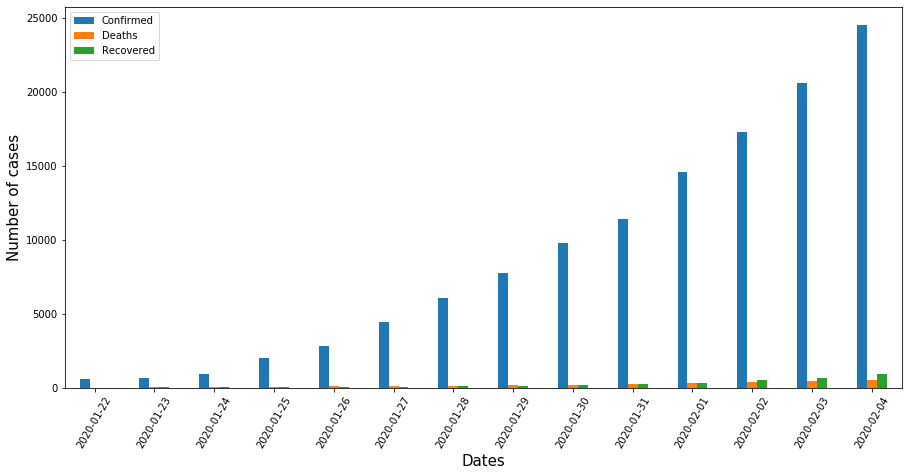

In [48]:
#setting the image size
plt.rcParams['figure.figsize']=(15,7)

#plotting the cases by date
data.groupby(['Date_date']).sum().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Number of cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)

Text(0.5, 0, 'Dates')

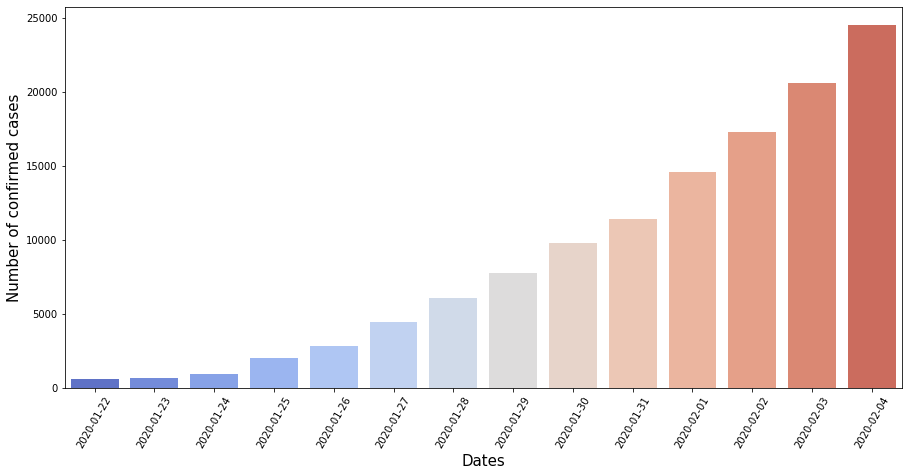

In [49]:
# no of confirmed cases by date

sns.axes_style("whitegrid")
sns.barplot(x="Date_date",
            y="Confirmed",
            data=data.groupby(['Date_date']).sum().reset_index(drop=None),
            palette=sns.color_palette("coolwarm", 15))

plt.xticks(rotation=60)
plt.ylabel('Number of confirmed cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)


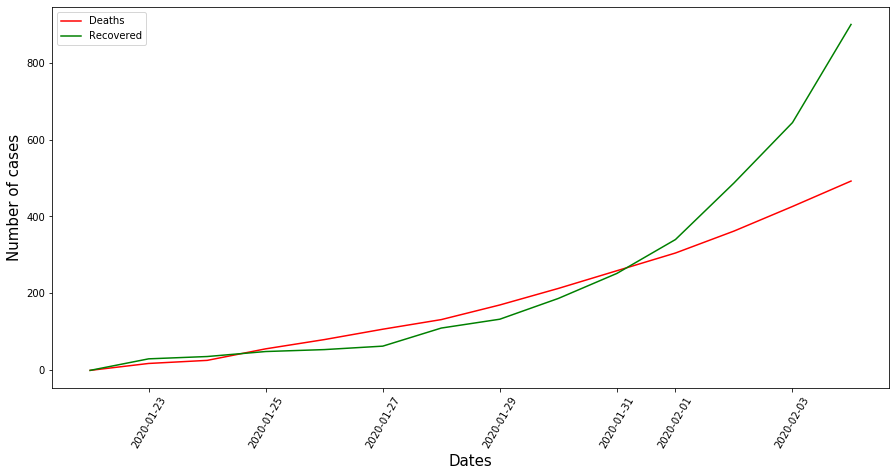

In [50]:
#plotting two line plots for deaths and recoveries respectively

plt.plot('Date_date', 'Deaths', data=data.groupby(['Date_date']).sum().reset_index(drop=None), color='red')
plt.plot('Date_date', 'Recovered', data=data.groupby(['Date_date']).sum().reset_index(drop=None), color='green')
plt.xticks(rotation=60)
plt.ylabel('Number of cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)
plt.legend()
plt.show()

Text(0.5, 0, 'Countries')

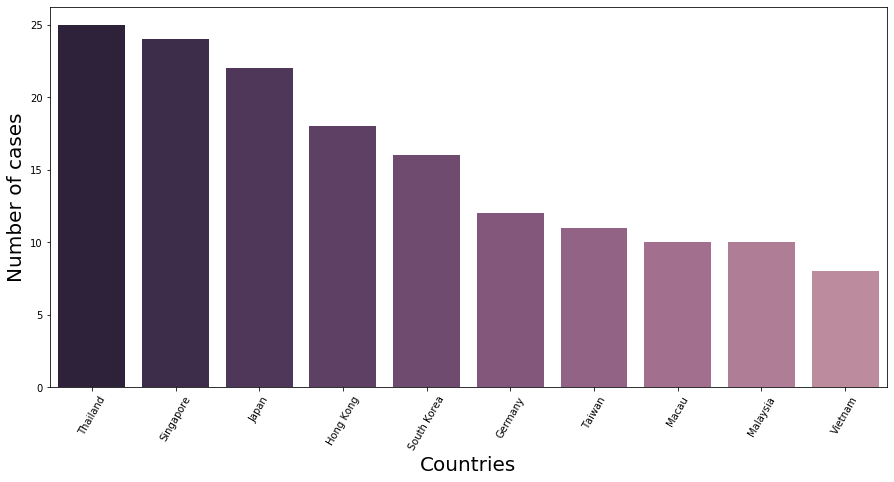

In [51]:
#We know that China is the most affected country by a large margin, 
#so lets create a bar plot to compare countries other than China

sns.barplot(x="Country",
            y="Confirmed",
            data=df_country[df_country.Country!='China'].nlargest(10,'Confirmed'),
            palette=sns.cubehelix_palette(15, reverse=True)
           )

plt.xticks(rotation=60)
plt.ylabel('Number of cases',fontsize=20)
plt.xlabel('Countries',fontsize=20)


Text(0.5, 0, 'Dates')

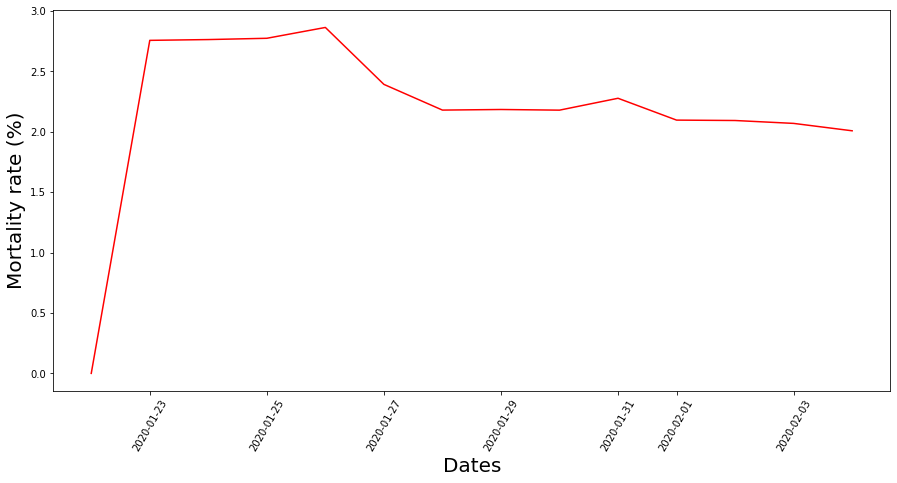

In [52]:
#The mortality rate, at any point in time, can be roughly calculated 
#by dividing the number of deaths by the number of confirmed cases
df_by_date['mrate']=df_by_date.apply(lambda x: x['Deaths']*100/(x['Confirmed']), axis=1)
plt.plot('Date_date','mrate',data=df_by_date, color='red')

plt.xticks(rotation=60)
plt.ylabel('Mortality rate (%)',fontsize=20)
plt.xlabel('Dates',fontsize=20)


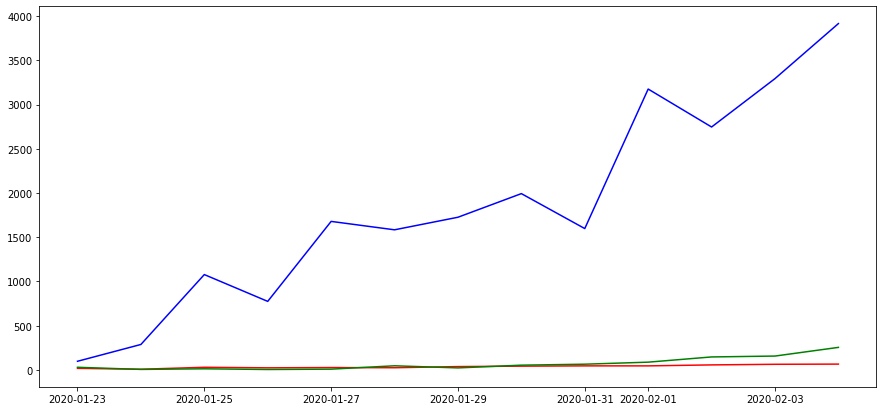

In [53]:
plt.plot('Date_date', 'daily_deaths', data=df_by_date, color='red')
plt.plot('Date_date', 'daily_recoveries', data=df_by_date, color='green')
plt.plot('Date_date', 'daily_cases', data=df_by_date, color='blue')

Text(0.5, 0, 'Provinces')

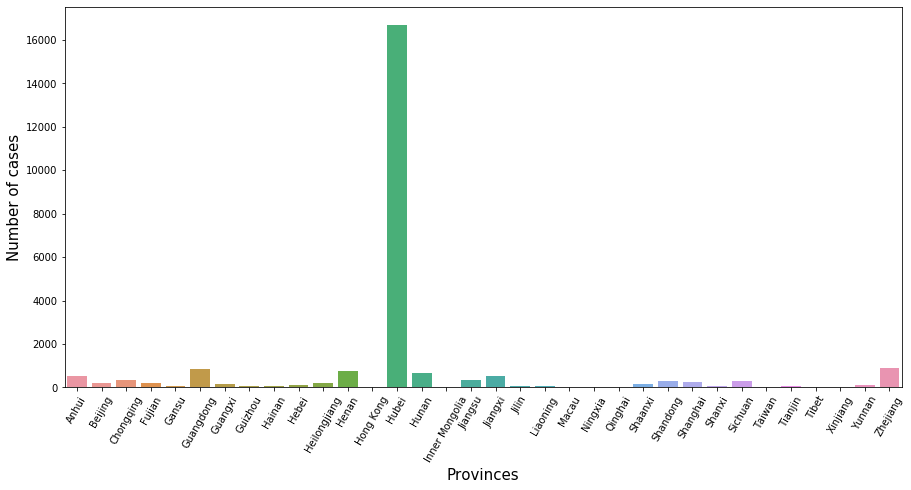

In [54]:
#creating a separate dataframe for provinces and making a bar plot

df_province=data[data['Country']=='China'].groupby(['Province/State']).max().reset_index(drop=None)
sns.barplot(x="Province/State", y="Confirmed", data=df_province,ci=None)
plt.xticks(rotation=60)
plt.ylabel('Number of cases',fontsize=15)
plt.xlabel('Provinces',fontsize=15)


Text(0, 0.5, 'Number of cases')

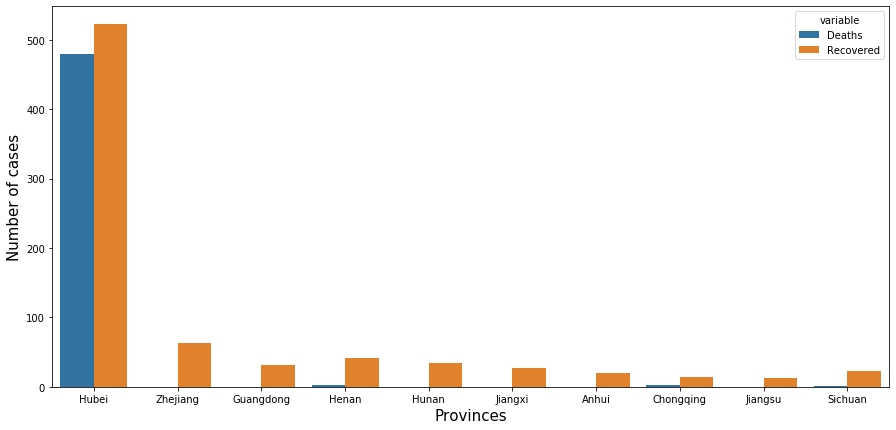

In [55]:
#selecting 10 most affected provinces
df_province=df_province.nlargest(10,'Confirmed')

df_province=df_province[['Province/State','Deaths','Recovered']]

#for multi-bar plots in seaborn, we need to melt the dataframe so #that the the deaths and recovered values are in the same column
df_province= df_province.melt(id_vars=['Province/State'])

sns.barplot(x='Province/State', y='value', hue='variable', data=df_province)
plt.xlabel('Provinces',fontsize=15)
plt.ylabel('Number of cases',fontsize=15)